# Selamat Datang
Selamat Datang di course Machine Learning for Marketing: Customer Segmentation, dimana Anda akan diberikan materi step by step dan langsung praktek dengan berbagai fitur DQLab – yang memang dirancang untuk membantu Anda agar mudah menyerap materi dan memanfaatkannya dalam pekerjaan sehari-hari.

Course ini dirancang dengan menggunakan dataset dari kasus skenario nyata di Indonesia. Untuk course, dataset yang digunakan cukup kecil dengan tujuan Anda dapat lebih mudah memahami dataset ini dan mampu beradaptasi ketika dihadapkan dataset yang lebih kompleks – seperti Anda akan temukan di bagian project DQLab.

Apa yang akan Anda pelajari sepanjang course ini?

Apa dan kenapa Customer Segmentation dalam penggunaan di bisnis?
Aplikasi Customer Segmentation secara teknis dengan Algoritma K-Means di R
Bagaimana mempersiapkan data profil pelanggan di R agar dapat digunakan oleh algoritma K-Means
Mempaketkan algoritma sebagai model dan mengoperasionalkannya sehingga dapat digunakan sehari-hari oleh bisnis
Bagaimana Anda menarik manfaat dari DQLab ini?

Pelajari contoh dataset dalam course, karena walaupun kecil tapi mencerminkan
Kerjakan soal dan praktek sesuai dengan irama yang Anda rasa nyaman
Submit soal sesuai dengan permintaan soal
Tekan hint jika Anda merasa kesulitan
Ikut serta dan menyelesaikan project karena memiliki tingkat kompleksitas yang lebih tinggi dan mencerminkan kasus riil
Siap untuk memulai? Klik tombol Next untuk melanjutkan course.

In [ ]:
https://youtu.be/MI3rtVyBEC8

# Kesimpulan
Customer segmentation adalah proses penting yang diperlukan di bisnis untuk mengenal customer dengan lebih baik
Dengan demikian proses bisnis di marketing (pemasaran) dan CRM (customer relationship management) bisa dilakukan lebih tajam. Contoh: pesan marketing bisa lebih personal untuk setiap segment dengan biaya lebih optimal.
Dengan proses yang lebih tajam, performa bisnis berpotensi tinggi menjadi lebih baik juga.
Untuk menemukan segmentasi yang baik, perlu proses analisa data dari profile customer yang cukup banyak dan rutin. Ini bisa dibantu dengan algoritma komputer.

# Pengantar
Persiapan data adalah langkah pertama yang kita lakukan sebelum menggunakan algoritma apapun untuk melakukan analisa data.

Ini dikarenakan tiap implementasi algoritma menuntut struktur dan tipe data yang berbeda.

Dan untuk kasus algoritma K-Means yang akan kita gunakan untuk otomatisasi clustering, maka struktur datanya adalah data.frame atau matrix yang di dalamnya berisi angka semua. Tidak ada yang boleh bertipe karakter.

Namun pada kasus riil, hal ini tentulah tidak mungkin. Contoh, isi data profesi seperti "Professional", "Ibu Rumah Tangga" adalah teks. Dan ini perlu dikonversi dulu ke numerik, namun jika diperlukan tetap bisa kembali mengambil data teks.

Nah, untuk lebih jelasnya. Kita akan lakukan langkah-langkah praktek yang akan kita lakukan berikut ini adalah untuk mempersiapkan data sebelum dapat digunakan algoritma clustering:

1. Mengenal Contoh File Dataset Pelanggan
2. Membaca File dengan read.csv
3. Vector untuk Menyimpan Nama Field
4. Konversi Data dengan data.matrix
5. Menggabungkan Hasil Konversi
6. Menormalisasikan Nilai Belanja
7. Membuat Data Master

# Dataset Customer Segments
Dataset yang kita gunakan adalah data customer dengan field “Customer ID”, “Nama Pelanggan”,”Jenis Kelamin”,”Umur”, “Profesi”, “Tipe Residen” dan “Nilai Belanja Setahun” dengan tampilan sebagai berikut.

Dataset ini bisa dilihat di https://storage.googleapis.com/dqlab-dataset/customer_segments.txt
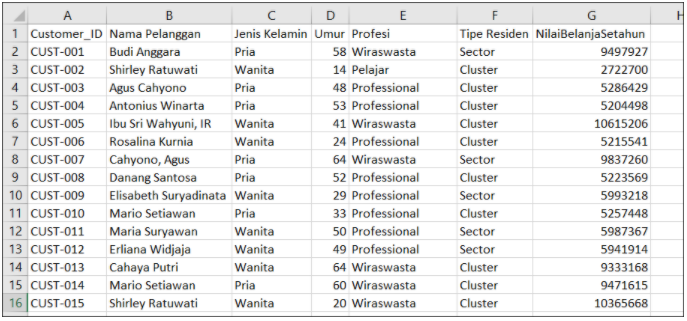
Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

1. Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
2. Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
3. Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
4. Umur: Umur dari pelanggan dalam format angka
5. Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
6. Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
7. NilaiBelanjaSetahun: Merupakan

Terlihat kalau ada kolom yang berisi angka saja, yaitu Umur dan NilaiBelanjaSetahun. Sisanya diisi data kategori untuku kolom "Jenis Kelamin", "Profesi" dan "Tipe Residen". Sedangkan "Customer ID" dan "Nama Pelanggan" kita anggap memiliki nilai yang unik untuk tiap baris data dan mewakili tiap individu.

Karena kolom "Customer ID" dan "Nama Pelanggan" karena unik maka tidak akan dijadikan variable penentu segmentasi yang kita lakukan, namun sisa kolom lainnya akan digunakan.

Nah dengan contoh dataset inilah, kita akan mencoba mencari jumlah segmentasi yang paling optimal – dimana antar tiap data pelanggan dalam segmen memiliki kemiripan tinggi – sepanjang course ini.

# Membaca data dengan fungsi read.csv
Langkah pertama yang perlu kita lakukan adalah membaca dataset tersebut dari file teks menjadi data.frame di R dengan perintah read.csv.

Mari kita praktekkan penggunaan read.csv ini dengan mengetikkan perintah berikut pada code editor.

pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

Keterangan code:

pelanggan: nama variable yang digunakan untuk menampung data dari contoh dataset
csv: function yang digunakan untuk membaca contoh dataset yang berupa file
https://storage.googleapis.com/dqlab-dataset/customer_segments.txt: lokasi dataset yang terdapat di web DQLab. Jika lokasi file dan aplikasi R terdapat di komputer lokal Anda, maka gantilah dengan lokasi file di lokal. Misalkan c:\data\customer_segments.txt
Jika terjadi error berikut, maka periksa kembali penulisan code – huruf besar, huruf kecil dan juga penulisan lokasi file – dengan teliti.

Error in file(file, "rt") : cannot open the connection

Jika tidak terjadi error maka langkah selanjutnya adalah menampilkan isi data dengan mengetikkan nama variable pelanggan pada code editor sebagai berikut.

pelanggan

Hasil eksekusi perintah ini akan tampak sebagai berikut.
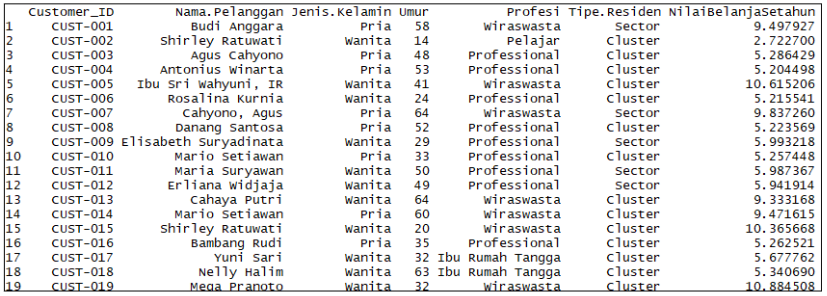
Terlihat isi data dengan enam kolom dan terdapat nomor baris pada tiap data yang ditampilkan.

Perhatikan jika nama kolom asal terdapat karakter spasi, akan diubah menjadi tanda titik setelah dibaca dengan read.csv. Sebagai contoh, "Nama Pelanggan" diubah menjadi "Nama.Pelanggan".

Jika kita hanya ingin menampilkan beberapa kolom tertentu, misalkan untuk kolom "Jenis.Kelamin" dan "Profesi" maka perintahnya adalah sebagai berikut.

# Praktek:

Lengkapi code pada code editor untuk  menampilkan data frame dari kolom dari "Jenis.Kelamin", "Umur", "Profesi" dan "Tipe.Residen".

In [ ]:
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan[c("Jenis.Kelamin", "Umur", "Profesi", "Tipe.Residen")]


# Vector untuk Menyimpan Nama Field
Perhatikan jika nama-nama field yang telah kita gunakan pada praktek sebelumnya, sebenarnya adalah sebuah vector

c("Jenis.Kelamin", "Umur", "Profesi", "Tipe.Residen")

Dan ini bisa dimasukkan ke dalam variable, dengan tujuan dapat digunakan berulang kali dalam script R.

Tugas Praktek

Gantilah tulisan [jawaban1] pada code editor dengan variable vector bernama field_yang_digunakan dan diisi dengan 3 teks: "Jenis.Kelamin", "Umur" dan "Profesi" .

Kemudian tampilkan isi variable pelanggan dengan field_yang_digunakan dengan code yang akan menggantikan [jawaban2] pada code edito

In [ ]:
#Membaca data csv dan dimasukkan ke variable pelanggan
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt",sep="\t")
#Buat variable field_yang_digunakan dengan isi berupa vector "Jenis.Kelamin", "Umur" dan "Profesi"
field_yang_digunakan <- c("Jenis.Kelamin", "Umur", "Profesi")
#Tampilan data pelanggan dengan nama kolom sesuai isi vector field_yang_digunakan
pelanggan[field_yang_digunakan]

# Konversi Data dengan data.matrix
Seperti telah dijelaskan sebelumnya, isi data dari tiga kolom pelanggan yaitu "Jenis.Kelamin", "Profesi" dan "Tipe.Residen" merupakan data kategori yang berupa teks.

Untuk fungsi k-means, ketiga kolom ini tidak bisa digunakan kecuali isi dikonversi menjadi numerik. Salah satu caranya adalah dengan menggunakan fungsi data.matrix.

Perintahnya cukup sederhana, seperti terlihat pada contoh berikut.

data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi")])

Perintah ini akan mengkonversi data pelanggan pada kolom "Jenis.Kelamin" dan "Profesi" yang diwakili oleh pelanggan[c("Jenis.Kelamin", "Profesi")] menjadi numerik.
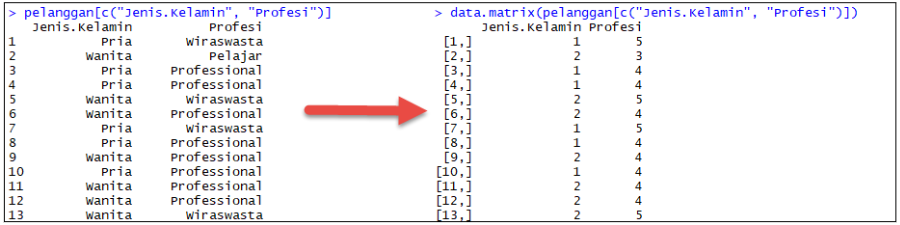
Terlihat, teks "Pria" diubah menjadi angka 1, "Wanita" diubah menjadi angka 2, "Wiraswasta" diubah menjadi angka 5, dan seterusnya.

Tugas Praktek

Gantilah tulisan […]pada editor dengan code yang sesuai.

Buatlah variable pelanggan_matrix yang diisi dengan konversi teks menjadi numerik dari variable pelanggan pada kolom "Jenis.Kelamin", "Profesi", dan "Tipe.Residen".

In [ ]:
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt",sep="\t")
#Konversi data menjadi numerik
pelanggan_matrix  <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])


# Menggabungkan Hasil Konversi
Setelah Anda bisa melakukan konversi ke angka, kita perlu mengetahui bagaimana menggabungkan kembali data tersebut ke variable asal kita.

Ini berguna terutam apada praktek lanjutan di akhir course, yaitu ketika kita akan mengenali data pelanggan baru masuk ke segment mana.

Untuk menggabungkan data hasil konversi data.matrix ke pelanggan, kita gunakan funtion data.frame.

Sebagai contoh, untuk menggabungkan variable pelanggan dan pelanggan_matrix maka perintahnya adalah sebagai berikut.

data.frame(pelanggan, pelanggan_matrix)

Tugas Praktek

Gantilah tulisan […]pada editor dengan code yang sesuai.

Gabungkan variable pelanggan dan pelanggan_matrix dengan function data.frame dan masukkan kembali ke variable pelanggan.

Catatan: Jika berhasil, maka isi penggabungan ini akan menambahkan kolom bernama "Jenis.Kelamin.1", "Profesi.1", dan "Tipe.Residen.1" yang sebelumnya tidak ada pada kedua variable seperti berikut.

In [ ]:
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt",sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
#Penggabungan data
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
#Tampilkan kembali data hasil penggabungan
pelanggan


Akhiran .1 ini ditambahkan karena di variable pelanggan sudah ada nama kolom yang sama.

Sebagai contoh kolom "Jenis.Kelamin" yang terdapat pada pelanggan_matrix sudah ada juga di variable pelanggan. Jadi ketika digabungkan, R akan menambahkan akhiran .1 untuk kolom "Jenis.Kelamin" yang terdapat di pelanggan_matrix.



# Menormalisasikan Nilai Belanja
Kali ini kita perhatikan kolom "NilaiBelanjaSetahun" isi datanya bernilai jutaan. Ketika kolom ini digunakan untuk clustering, perhitungan sum of squared errors (pada bab kmeans) akan menjadi sangat besar.

Kita akan menormalisasikan nilainya agar perhitungan lebih sederhana dan mudah dicerna, namun tidak mengurangi akurasi. Ini terutama akan sangat bermanfaat jika jumlah data sangat banyak, misalkan memiliki 200 ribu data.

Normalisasi bisa dilakukan dengan banyak cara. Untuk kasus kita, cukup dengan pembagian sehingga nilai jutaan menjadi puluhan.

Mari kita langsung lakukan dengan mengerjakan praktek berikut.

Tugas Praktek

Gantilah tulisan […]pada editor dengan code yang sesuai.

Isilah kolom NilaiBelanjaSetahun dengan nilai dari kolom itu sendiri dibagi dengan 1000000.

In [ ]:
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
#Normalisasi Nilai
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun / 1000000


Membuat Data Master
Setelah penggabungan data, kita jadi mengetahui sebenarnya teks kategori dikonversi menjadi angka numerik berapa.

Sebagai contoh, jika kita menampilkan data kolom "Profesi" dan "Profesi.1" dengan perintah berikut.

pelanggan[c("Profesi","Profesi.1")] 

maka sebagian hasilnya akan tampil sebagai berikut.

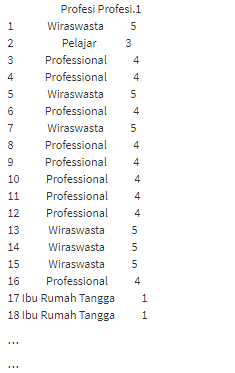


Kelihatan kalau Wiraswasta dikonversi menjadi angka 5, Pelajar menjadi angka 3, Professional menjadi angka 4, Ibu Rumah Tangga menjadi angka 1, dan satu lagi  adalah Mahasiswa yang dikonversi menjadi angka 2 (tidak terlihat disini).

Daftar data kategori dan hasil konversinya sangat penting untuk dijadikan referensi sehingga nanti ketika ada data baru, kita bisa "petakan" menjadi data numerik yang siap digunakan untuk algoritma clustering.

Nah, masalahnya data di atas terlalu panjang, padahal sebenarnya kita cuma perlu 5 baris data bukan? Di R, kita bisa meringkasnya dengan function unique.

Contoh perintahnya adalah sebagai berikut:

unique(pelanggan[c("Profesi","Profesi.1")])

Hasilnya akan tampak sebagai berikut.

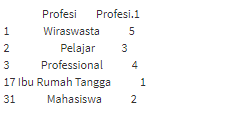 

Terlihat ya datanya sudah diringkas dengan teks kategori beserta pasangan numeriknya. Kemudian perhatikan juga angka-angka 1,2,3,17 dan 31 yang terdapat di bagian paling kiri. Ini menunjukkan posisi baris ditemukannya teks tersebut.

Data ringkas dan unik ini untuk selanjutnya kita sebut sebagai data referensi atau data master.

Tugas Praktek

Gantilah tulisan […]pada editor dengan code yang sesuai.

Buatlah tiga variable dengan nama Profesi, Jenis.Kelamin dan Tipe.Residen yang isinya berisi daftar unik dari pasangan kolom "Profesi" dan "Profesi.1", "Jenis.Kelamin" dan "Jenis.Kelamin.1", "Tipe.Residen" dan "Tipe.Residen.1".

In [ ]:
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt",sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
pelanggan$NilaiBelanjaSetahun = pelanggan$NilaiBelanjaSetahun/1000000
#Mengisi data master
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])


# Kesimpulan
Selamat, Anda sudah menjalankan praktek-praktek yang menjadi dasar dari semua hal sebelum penggunaan analisa data, yaitu tahap persiapan data atau data preparation.

Untuk algoritma clustering k-means yang akan kita gunakan di R, maka tahap data preparationnya adalah menyiapkan data yang di dalamnya harus berisi numerik.

Namun pada banyak kasus riil, data tidak sepenuhnya berisi numerik seperti telah kita lihat sendiri dan praktekkan dengan contoh dataset yang digunakan pada bab ini dengan langkah-langkah berikut:

1. Mengenal Contoh File Dataset Pelanggan, dimana kita mengerti dulu bagaimana bentuk dan isi dari contoh yang digunakan.
2. Membaca File dengan read.csv, dimana kita membaca suatu file teks dengan pemisah berupa tab menggunakan fungsi read.csv.
3. Vector untuk Menyimpan Nama Field, dimana nama-nama field bisa disimpan dalam bentuk vector sehingga bisa digunakan berulang ketika kita buturh referensi nama-nama field yang sama.
4. Konversi Data dengan data.matrix, dimana kita bisa melakukan konversi data dari kategori teks menjadi numerik.
5. Menggabungkan Hasil Konversi, dimana hasil konversi ini perlu kita gabungkan kembali ke variable asal agar kita tidak kehilangan referensinya.
6. Menormalisasikan Nilai Belanja, dimana kita merubah skala data nilai belanja dari jutaan menjadi puluhan dengan tujuan penyederhanaan perhitungan namun tidak mengurangi akurasi.
7. Membuat Data Master, dimana kita meringkas data kategori dan numerik ke dalam variable-variable yang kita sebut sebagai data master.

Dengan demikian, kita sudah siap melangkah ke bab berikutnya: Clustering dan Algoritma K-Means.



# Apa itu Clustering dan algoritma K-Means?
Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Beberapa contoh clustering:

1. Pengelompokan manusia berdasarkan umur: bayi, balita, anak, remaja, dewasa, tua.
2. Pengelompokan customer berdasarkan daya belinya: regular dan premium.
3. Pengelompokan makanan berdasarkan kandungan gizinya: biji-bijian, sayuran, buah-buahan, minyak, protein, dan lain-lain.

Banyak algoritma telah dikembangkan untuk melakukan clustering secara otomatis, salah satu yang sangat populer adalah K-Means yang akan menjadi fokus utama course kita.

 K-means adalah algoritma yang membagi data menjadi sejumlah partisi dengan cara sederhana: mencari kedekatan dari tiap titik pada suatu cluster dengan sejumlah nilai rata-rata atau mean.

 Ada dua konsep kunci yang juga menjadi nama asal k-means:

1. Jumlah partisi yang diinginkan, diwakili oleh huruf k
2. Mencari "jarak" kedekatan tiap titik ke sejumlah nilai rata-rata cluster yang diamati, diwakili oleh means
3. Algoritma k-means sudah ada di paket dasar R dalam bentuk function bernama kmeans. Sepanjang bab ini, kita akan menggunakan function ini dan menganalisa output yang dihasilkan.



https://youtu.be/6QV4vPpDxKQ

# Fungsi kmeans
Praktek kali ini kita akan melakukan segmentasi langsung pada data pelanggan – yang telah kita lakukan persiapan datanya pada bab sebelumnya – dengan menggunakan function kmeans.

 Function kmeans memerlukan minimal 2 parameter, yaitu:

1. x: data yang digunakan, dimana semua isi datanya harus berupa numerik.
2. centers: jumlah cluster yang diinginkan.

Terbaik disini artinya jarak antara tiap titik ke mean dari clusternya sendiri lebih kecil dibandingkan ke mean dari cluster lain.

Catatan: Mean atau nilai rata-rata disini sering disebut juga dengan centroid pada berbagai literatur data science.

Dan fungsi kmeans ini biasanya disertai dengan pemanggilan function seet.seed. Ini berguna agar kita "menyeragamkan" daftar nilai acak yang sama dari kmeans sehingga kita mendapatkan output yang sama.

Berikut adalah contoh penggunaan fungsi kombinasi set.seed dan kmean.

set.seed(100)

kmeans(x=pelanggan[c("Umur","Profesi.1")], centers=3)

Ini artinya kita membagi data pelanggan berdasarkan "Umur" dan "Profesi" menjadi 3 segmen.

Kadang kala berdasarkan pengalaman DQLab, parameter data dan jumlah segmen saja tidak cukup. Perlu digunakan parameter ketiga yaitu nstart, merupakan jumlah kombinasi acak yang dihasilkan secara internal oleh R. Dan dalam jumlah yang kita berikan, algoritma akan memilih mana yang terbaik dari kombinasi-kombinasi tersebut.

Berikut adalah modifikasi pemanggailan fungsi dengan parameter tambahan nstart sebesar 25.

kmeans(x=pelanggan[c("Umur","Profesi.1")], centers=3, nstart=25)

Tugas Praktek

Code editor telah dilengkapi dengan potongan code untuk data preparation, dan kita perlu melengkapi […] dengan fungsi kmeans.

Sesuai contoh pada Lesson, lengkapi fungsi kmeans tersebut dengan:

1. x: berisi data pelanggan dengan field-field yang diambil dari vector field_yang_digunakan (sudah didefinisikan di potongan code)
2. centers: jumlah segmen / cluster yang kita inginkan. Isi dengan 5.
3. nstart: isi dengan angka 25

Ketika dieksekusi dengan lancar, Anda harusnya mendapatkan hasil seperti gambar di bawah ini.
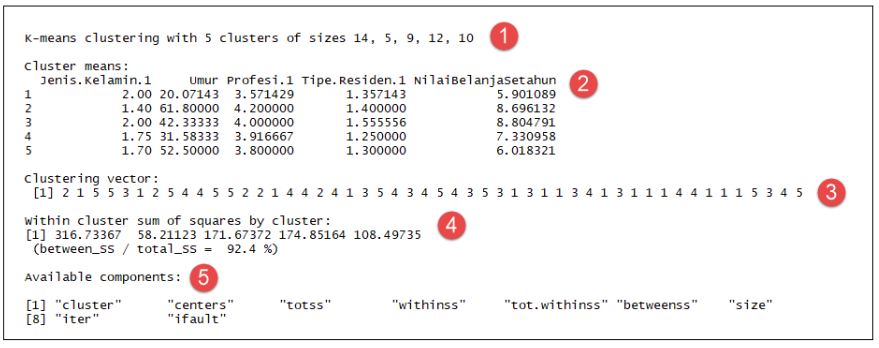
Hasil ini dapat dibagi dalam lima bagian, dengan penjelasan sesuai nomor urut pada gambar sebagai berikut:

1. Ukuran / jumlah titik data pada tiap cluster
2. Nilai rata-rata (centroid) dari tiap cluster
3. Pembagian cluster dari tiap elemen data berdasarkan posisinya
4. Jumlah jarak kuadrat dari tiap titik ke centroidnya
5. Komponen informasi lain yang terkandung di dalam objek kmeans ini

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
#fungsi kmeans untuk membentuk 5 cluster dengan 25 skenario random dan simpan ke dalam variable segmentasi
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
#tampilkan hasil k-means
segmentasi


# Analisa Hasil Clustering Vector
Untuk menganalisa hasil, DQLab akan mengawali dari hasil bagian ketiga, yaitu clustering vector.
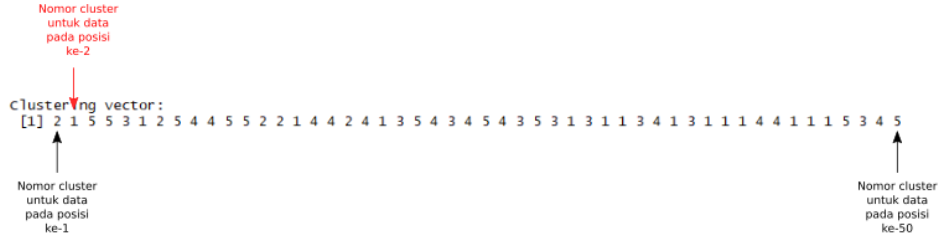
Clustering vector ini adalah rangkaian vector yang berisi angka cluster. Dari hasil kita, vector berisi angka 1 sampai dengan 5, maksimum sesuai dengan jumlah cluster yang kita inginkan.

Vector ini dimulai dari angka 2, yang artinya data pertama dari dataset kita akan dialokasikan pada nomor cluster 2. Dari gambar juga terlihat isi vector kedua bernlai 1, ini artinya data kedua dari dataset kita dialokasikan pada nomor cluster 1, dan seterusnya. Posisi data terakhir (ke-50) memiliki nomor cluster 5.

Hasil ini dapat diakses dengan komponen cluster dari objek hasil seperti berikut:

segmentasi$cluster

Ini akan mendapatkan hasil yang sama dengan gambar di atas.

Tugas Praktek

Nah, sekarang tugas kita adalah menambahkan hasil segmentasi ini ke data asal. Caranya cukup gampang, yaitu dengan cara membuat kolom baru (kita namakan cluster) di variable pelanggan yang isinya dari segmentasi$cluster.

Ketik perintah berikut pada bagian code editor setelah bagian komentar #Penggabungan hasil cluster

pelanggan$cluster <- segmentasi$cluster
Kemudian tampilkan struktur dari data pelanggan dengan perintah str.

In [ ]:
#Bagian Data Preparation

pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])

pelanggan <- data.frame(pelanggan, pelanggan_matrix)

Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])

Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])

Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000

field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")

#Bagian K-Means

set.seed(100)

segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)

#Penggabungan hasil cluster

segmentasi$cluster

pelanggan$cluster <- segmentasi$cluster

str(pelanggan)


# Analisa Hasil Cluster Size
Tahap berikutnya, Kita akan analisa hasil pada bagian pertama

K-means clustering with 5 clusters of sizes 14, 5, 9, 12, 10
Ini artinya dengan k-means kita telah membagi dataset pelanggan dengan 5 cluster, dimana:

1. Cluster ke-1 memiliki 14 data
2. Cluster ke-2 memiliki 5 data
3. Cluster ke-3 memiliki 9 data
4. Cluster ke-4 memiliki 12 data
5. Cluster ke-5 memiliki 10 data
Dengan jumlah total 50 data, yang juga merupakan jumlah data total pelanggan.

Mari kita verifikasi hal tersebut dengan memulai dari cluster 1. Ambil data pelanggan yang isi dari kolom clusternya adalah 1 dengan menggunakan fungsi which, seperti perintah berikut pada live code editor di bawah komentar #Filter cluster ke-1.

which(pelanggan$cluster == 1)
Anda seharusnya dapatkan hasil sebagai berikut:

[1]  2  6 15 20 31 33 34 37 39 40 41 44 45 46 
Hasil di atas menunjukkan 14 angka posisi data untuk cluster 1. Banyaknya angka pada deretan ini sesuai ukuran untuk cluster ke-1 dari informasi di atas.

Sekarang cobalah hitung jumlah deretan dengan menambahkan perintah length pada fungsi which seperti berikut:

length(which(pelanggan$cluster == 1))
Jika dijalankan maka akan didapatkan angka 14.

Tugas

Tampilkan ukuran cluster ke-2 dari pelanggan

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
pelanggan$cluster <- segmentasi$cluster
#Analisa hasil
#Filter cluster ke-1
which(pelanggan$cluster == 1)
length(which(pelanggan$cluster == 2))

# Melihat Data pada Cluster ke-N
Sejauh ini, kita belum melihat data hasil cluster. Pastinya, penasaran untuk melihat hasil tersebut, bukan?

Ini dapat dihasilkan dengan cukup mudah setelah kita ikuti praktek sebelumnya, dimana hasil cluster telah diintegrasikan dan juga mengerti cara filter baris-baris data (data rows) dengan which.

Berikut adalah perintah yang dapat diketikkan pada code editor (di bawah comment #Melihat data cluster ke-1) untuk melihat seluruh data pada cluster ke-1

pelanggan[which(pelanggan$cluster == 1),] Jika berhasil dieksekusinya, hasilnya akan terlihat sebagai berikut. 
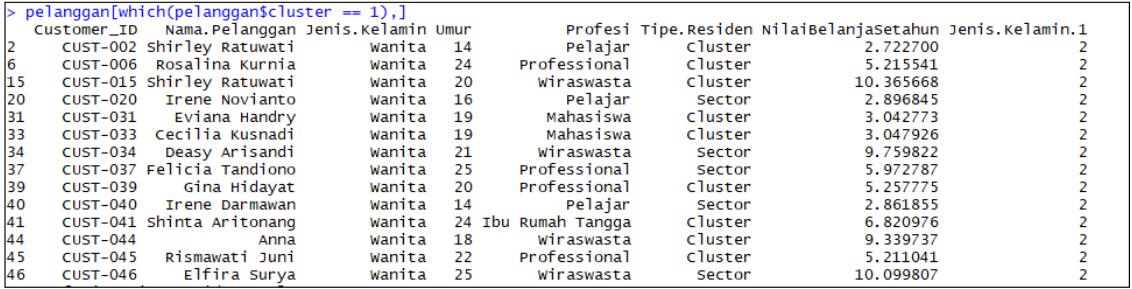


dimana ada 14 data denangan seluruh data berjenis kelamin wanita dan umur antara 14 s/d 25 tahun. Penghasilan, profesi, nilai belanja dan tipe residen cukup bervariasi.

Dan ubahlah perintah untuk melihat cluster ke-2.

pelanggan[which(pelanggan$cluster == 2),] 

Akan tampil data sebagai berikut, dimana terlihat umur mayoritas sudah masuk usia 50 tahun ke atas dan kebanyakan adalah wiraswasta kecuali satu yang ibu rumah tangga. Dan rata-rata nilai belanja adalah sekitar 9 juta, kecuali yang berprofesi ibu rumah tangga.
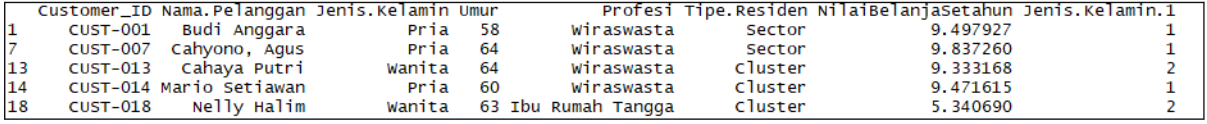

# Tugas Praktek

Gantilah bagian […] dengan tiga perintah untuk melihat cluster nomor 3 sampai dengan 5.

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
pelanggan$cluster <- segmentasi$cluster
#Analisa hasil
#Melihat data cluster ke 3-5
pelanggan[which(pelanggan$cluster == 3),] 
pelanggan[which(pelanggan$cluster == 4),] 
pelanggan[which(pelanggan$cluster == 5),] 

Cluster means adalah hasil nilai rata-rata atau titik sentral (centroid) dari seluruh titik tiap cluster.
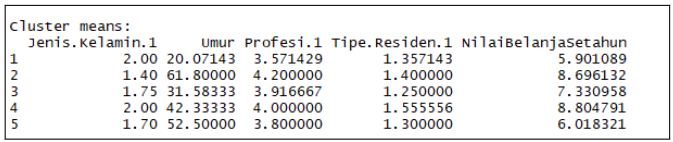# Analisa Hasil Cluster Means
Apa artinya hasil tersebut?

1. Kolom pertama yang berisi angka 1 sampai dengan 5 adalah mewakili nomor cluster.
2. Kolom Kelamin.1 menunjukkan nilai rata-rata dari data jenis kelamin yang telah dikonversi menjadi numerik, dengan angka 1 mewakili Pria dan angka 2 mewakili wanita.
 

Pada cluster 1 terlihat bahwa hanya ada angka 2, artinya cluster 1 hanya berisi data dengan profil berjenis kelamin wanita. Nah, untuk cluster ke-2 berupa angka 1.40 artinya data bersifat campuran namun cenderung ke Pria (1).

Kedua interpretasi angka ini sesuai dengan hasil praktek "Melihat Data pada Cluster-N".

 

1. Kolom Umur adalah representasi dari dataset awal tanpa mengalami konversi. Terlihat untuk cluster ke-1 umur rata-rata adalah 20 tahun, umur 61 tahun untuk cluster ke-2, dan seterusnya.
 

2. Kolom 1 menunjukkan nilai rata-rata data Profesi untuk tiap cluster yang telah dikonversi menjadi numerik.
 

Angka 1, 2, 3, 4 dan 5 masing-masing mewakili Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga dan Mahasiswa.

Terlihat untuk seluruh cluster, profesi cenderung ke Professional terutama untuk cluster ke-4.

 

1. Kolom Tipe.Residen.1 menunjukkan representasi data Tipe.Residen yang telah dikonversi menjadi numerik dengan angka 1 mewakili Cluster dan 2 mewakili Sector. Ini juga didapatkan dari hasil konversi data menjadi numerik pada praktek sebelumnya.

Terlihat untuk seluruh cluster, terlihat data cukup tersebar antara Sector dan Cluster terutama untuk cluster ke-4 dimana nilai kolom ini di angka 1.555.
 

2. Terakhir, kolom NilaiBelanjaSetahun cukup signifikan pembagiannya untuk tiap cluster. Dimana cluster ke-2 dan ke-4 memiliki nilai belanja lebih tinggi dibandingkan ketiga cluster lainnya.
 

Ini mungkin target customer yang bisa lebih disasar melalui marketing campaign, karena cluster ke-2 saat ini hanya berisi 5 data. Cukup kecil proporsinya, dan ingin ditingkatkan.

Ini terlihat dari hasil output kmeans bagian pertama yang menunjukkan distribusi jumlah data dari tiap cluster:

K-means clustering with 5 clusters of sizes 14, 5, 9, 12, 10

Tugas Praktek

Cobalah melihat hasil dari cluster means ini dengan langsung mengakses variable segmentasi pada komponen centers.

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
pelanggan$cluster <- segmentasi$cluster
#Analisa hasil
#Melihat cluster means dari objek 
segmentasi$centers

# Analisa Hasil Sum of Squares
Yang akan kita analisa berikutnya adalah bagian keempat, yaitu nilai metrik sum of squares seperti terlihat berikut ini.

Within cluster sum of squares by cluster:

[1] 316.73367  58.21123 174.85164 171.67372 108.49735 
(between_SS / total_SS =  92.4 %) 

Konsep sum of squares (SS) adalah jumlah "jarak kuadrat" perbedaan tiap titik data dengan mean atau centroidnya. SS ini bisa dengan mean atau centroid untuk tiap cluster atau secara keseluruhan data. Sum of squares dalam literatur data science lain sering disebut dengan Sum of Squared Errors (SSE).

Semakin besar nilai SS menyatakan semakin lebarnya perbedaan antar tiap titik data di dalam cluster tersebut.

Berdasarkan konsep tersebut, berikut adalah penjelasan untuk hasil output kmeans di atas:

1. Nilai 316.73367 adalah SS untuk cluster ke-1, 58.21123 adalah SS untuk cluste ke-2, dan seterusnya. Semakin kecil nilainya berpotensi semakin baik.
2. total_SS: adalah SS untuk seluruh titik terhadap nilai rata-rata global, bukan untuk per cluster. Nilai ini selalu tetap dan tidak terpengaruh dengan jumlah cluster.
3. between_SS: adalah total_SS dikurangi dengan jumlah nilai SS seluruh cluster.
4. (between_SS / total_SS) adalah rasio antara between_SS dibagi dengan total_SS. Semakin besar persentasenya, ummnya semakin baik.

Ini adalah metrik yang bisa kita gunakan untuk menjawab seberapa baik jumlah cluster yang kita bentuk? Apakah dibagi 2, 5, 10 atau 30?

Teknik penggunaan metrik ini cukup panjang, namun untuk kepentingan praktis kali ini kita hanya melihat perbedaan nilai ini dengan contoh.

Tugas Praktek

Gantilah […] pada code editor dengan empat perintah berikut.

set.seed(100)
kmeans(x=pelanggan[field_yang_digunakan], centers=2, nstart=25)
set.seed(100)
kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)

Jika berjalan dengan baik, bandingkan hasil antara kedua cluster tersebut. Anda harusnya dapat membandingkan hasil. Gambar akan membantu.
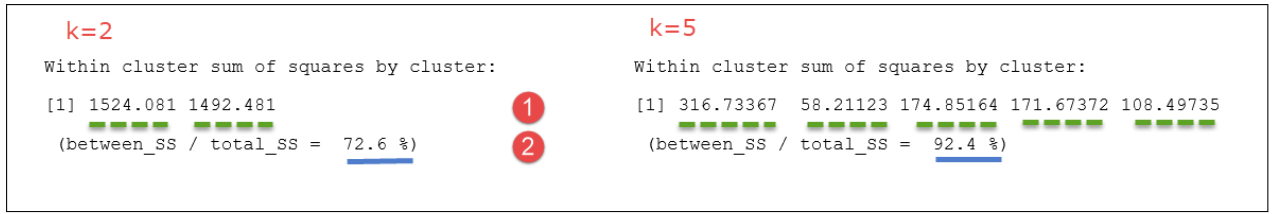
Terlihat untuk 2 cluster (k=2), SS per cluster lebih besar dibandingkan jika data dibagi menjadi 5 cluster (k=5). Perhatikan juga persentase rasio antara between_SS dan total_SS, dimana k=5 juga lebih besar.

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Membandingkan dengan 2 cluster kmeans, masing-masing 2 dan 5
set.seed(100)
kmeans(x=pelanggan[field_yang_digunakan], centers=2, nstart=25)
set.seed(100)
kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)

# Available Components
Analisa terakhir kita dari code adalah bagian kelimat, yaitu sembilan komponen objek yang bisa kita gunakan untuk lihat detil dari objek k-means.

Berikut adalah penjelasan singkat dari sembilan komponen tersebut.
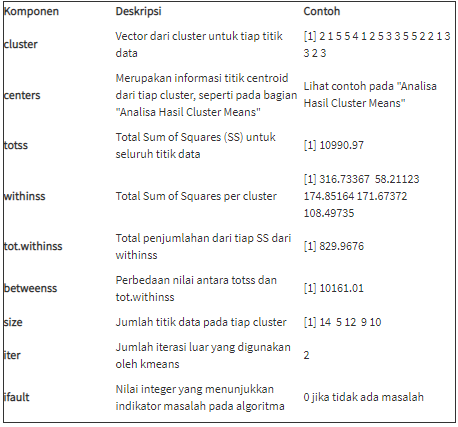
Seluruh komponen tersebut bisa diakses dengan menggunakan aksesor $. Contoh, dengan variable kmeans kita bernama segmentasi dan kita ingin mengakses komponen withinss, maka kita bisa gunakan perintah berikut yang sudah terdapat pada code editor.

segmentasi$withinssr

Jika dieksekusi maka Anda akan mendapatkan hasil berikut.

[1] 316.73367  58.21123 174.85164 171.67372 108.49735

Tugas Praktek

Ganti […] dengan 2 perintah untuk mengambil komponen cluster dan tot.withinss dari variable segmentasi.

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
segmentasi$withinss
segmentasi$cluster
segmentasi$tot.withinss 

# Kesimpulan
Pada bab ini Anda telah menyelesaikan penggunaan algoritma K-Means dengan function kmeans dari dataset yang telah dipersiapkan pada bab kedua.

Function kmeans sederhana digunakan tapi outputnya memiliki informasi yang kaya yaitu:

1. Ukuran / jumlah titik data pada tiap cluster
2. Nilai rata-rata (centroid) dari tiap cluster
3. Vector item dari cluster
4. Jumlah jarak kuadrat dari tiap titik ke centroidnya (Sum of Squares atau SS)
5. Komponen-komponen informasi lain

Dengan menganalisa hasil output ini, kita mampu menggabungkan nomor cluster ke data asal. Selain itu kita juga mengetahui bagaimana kedekatan tiap titik data dari clusternya sehingga menjadi bekal kita untuk menentukan jumlah cluster yang optimal.

Untuk yang disebutkan terakhir, kita akan lakukan pada bab berikut.

# Pengantar
Dari informasi yang dihasilkan oleh function kmeans, metrick Sum of Squares (SS) atau sering disebut Sum of Squared Errors (SSE) sangat penting untuk dijadikan dasar kita menentukan jumlah cluster yang paling optimal.

Secara teoritis, berikut adalah beberapa hal yang bisa kita amati dengan SS:

Semakin sedikit jumlah cluster yang dihasilkan maka semakin besar nilai SS.
Begitu juga sebaliknya, semakin banyak jumlah cluster yang dihasilkan maka semakin kecil nilai SS nya.
Karena sifatnya kuadratik, jika terdapat perbedaan yang cukup signifikan antara tiap kombinasi cluster maka perbedaan nilai SS akan semakin besar.
Dan seiring bertambahnya jumlah cluster, perbedaan tiap SS ini akan semakin kecil.
Jika dimasukkan ke dalam grafik garis, maka plotting dari total SS untuk tiap cluster berbentuk sebagai berikut.
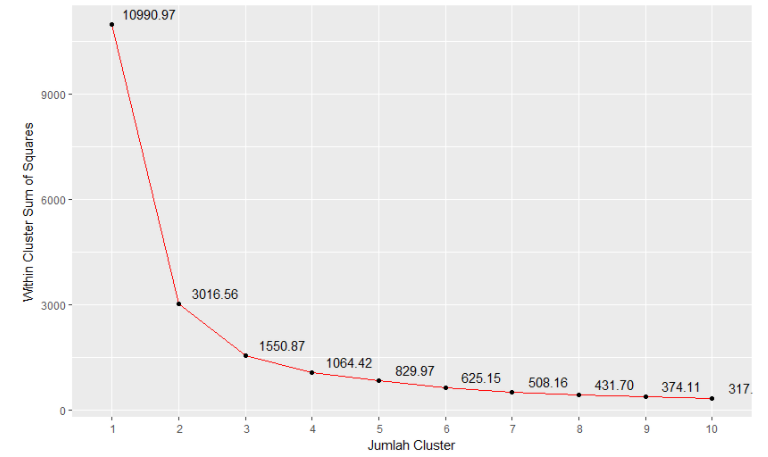
Titik paling kiri adalah jumlah SS untuk 1 jumlah cluster, titik kedua adalah untuk 2 jumlah cluster, dan seterusnya.Perhatikan semakin ke kanan perbedaan jarak antar tiap titik semakin mengecil.

Grafik garis ini memiliki bentuk seperti siku tangan, dan untuk optimal jumlah cluster biasanya kita mengambil titik sikunya. Pada contoh di atas kita bisa mengambil 4 atau 5.

Proses pengambilan keputusan berdasarkan plotting siku ini biasa kita sebut Elbow Effect atau Elbow Method

https://youtu.be/PcJXn1fIgJc

# Simulasi Jumlah Cluster dan SS
Metrik elbow method yang digunakan sebagai basis justifikasi adalah Sum of Squares (SS), atau lebih tepatnya komponen tot.withinss dari objek kmeans.

Metrik ini akan dicari progressive nilai tot.withinss untuk tiap kombinasi jumlah cluster, dan disimpan dalam bentuk vector di R.

Untuk keperluan ini, kita akan gunakan sapply. Function sapply akan digunakan untuk memanggil function kmeans untuk suatu range jumlah cluster. Range ini akan kita gunakan 1 sampai dengan 10.

Code lengkapnya sebagai berikut:

sse <- sapply(1:10,
function(param_k)
{
kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss
}
)

Berikut adalah penjelasan lengkap elemen-elemen perintah di atas
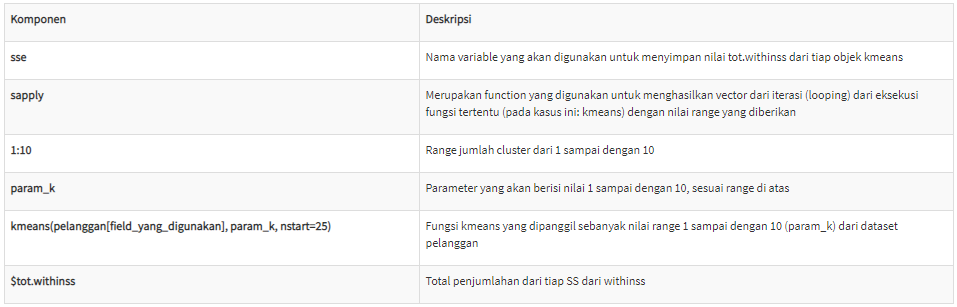

Gantilah […] pada code editor dengan code lengkap sapply di atas, dan tambahkan juga perintah untuk melihat isi variable sse.

Dan jika berhasil dieksekusi, maka hasilnya akan tampak sebagai vector berikut.

1.  10990.9740  3016.5612  1550.8725  1064.4187   829.9676   625.1462
2.   508.1568   431.6977   374.1095   317.9424

In [ ]:
#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <-pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
sse <- sapply(1:10, function(param_k) {kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss})
sse

# Grafik Elbow Effect
Kali ini kita akan visualisasikan vector Sum of Squares (SS) atau Sum of Squared Errors (SSE) yang telah kita hasilkan pada praktek sebelumnya.

Kita akan gunakan ggplot untuk visualisasi, datasetnya berupa penggabungan data frame dari sse dan range nilai 1:10, dengan perintah berikut.

jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(ssdata, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))
  
Berikut adalah gambaran grafik yang akan dihasilkan – dengan pasangan indikator nomor yang menunjukkan perintah dan komponen grafik yang dihasilkan. Sebagai contoh, penomoran nomor 1 yaitu  geom_line(color="red") menghasilkan grafik garis berwarna merah.
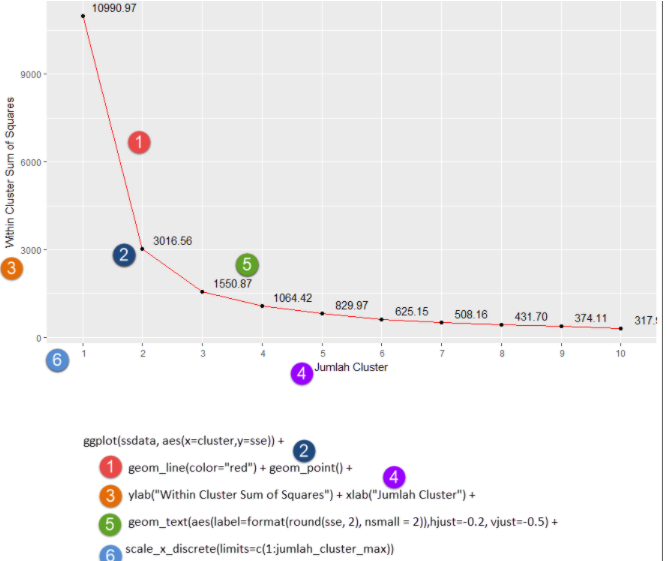
Tugas Praktek

Gantilah […] pada code editor code lengkap sapply di atas, dan tambahkan juga perintah untuk melihat isi variable sse.

Dan jika berhasil dieksekusi, maka akan muncul grafik berbentuk siku seperti berikut.

In [ ]:
library(ggplot2)

#Bagian Data Preparation
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Profesi <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])
pelanggan$NilaiBelanjaSetahun <- pelanggan$NilaiBelanjaSetahun/1000000
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
#Bagian K-Means
set.seed(100)
sse <- sapply(1:10, function(param_k){kmeans(pelanggan[field_yang_digunakan], param_k, nstart=25)$tot.withinss})

jumlah_cluster_max <- 10
ssdata = data.frame(cluster=c(1:jumlah_cluster_max),sse)
ggplot(ssdata, aes(x=cluster,y=sse)) +
                geom_line(color="red") + geom_point() +
                ylab("Within Cluster Sum of Squares") + xlab("Jumlah Cluster") +
                geom_text(aes(label=format(round(sse, 2), nsmall = 2)),hjust=-0.2, vjust=-0.5) +
  scale_x_discrete(limits=c(1:jumlah_cluster_max))


# Kesimpulan
Dengan memanfaatkan nilai Sum of Squares (SS) atau Sum of Squared Errors (SSE) kita bisa mengambil keputusan jumlah segmentasi optimal yang kita gunakan.

Ini dilakukan dengan membuat simulasi iterasi jumlah cluster dari 1 sampai dengan jumlah maksimum yang kita inginkan.  Pada contoh di bab ini, kita gunakan angka iterasi 1 sampai dengan 10.

Setelah mendapatkan nilai SS dari tiap jumlah cluster, kita bisa plotting ke grafik garis dan menggunakan elbow method untuk menentukan jumlah cluster optimal.

Tahap berikutnya adalah mempaketkan objek kmeans ini dan semua informasi yang berkaitan sehingga dapat digunakan untuk operasional.

# Pengantar
Setelah berhasil mempersiapkan data, menggunakan algoritma kmeans, dan akhirnya bisa memutuskan jumlah cluster terbaik.

Maka tahapan berikutnya adalah "memaketkan" atau "membungkus" seluruh referensi hasil konversi dan objek kmeans ini supaya bisa digunakan untuk mengolah data baru dan berguna di bisnis.

Untuk ini tahapannya adalah sebagai berikut:

1. Menamakan cluster dengan karakteristik yang lebih mudah dimengerti. Penamaan ini kita simpan dalam variable Segmen.Pelanggan.
2. Menggabungkan variable Segmen. Pelanggan, Profesi, Jenis.Kelamin, Tipe.Residen, dan Segmentasi ke dalam satu objek bertipe list ke dalam variable Identitas.Cluster.
3. Menyimpan objek Identitas.Cluster dalam bentuk file sehingga dapat digunakan kemudian, ini bisa disebut model bagi kita


# Menamakan Segmen
Pada praktek kali ini kita akan menamakan segmen sesuai dengan karakteristiknya. Untuk membantu, gambar berikut menunjukkan nilai mean tiap kolom yang digunakan tiap cluster dan juga nilai kolom sebelum konversi.
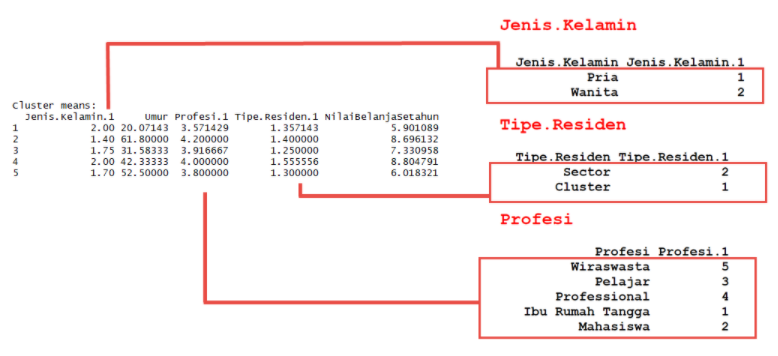
Mari kita coba namakan cluster 1 s/d 5 sebagai berikut:

1. Cluster 1 : Silver Youth Gals: alasannya adalah karena umurnya rata-rata adalah 20, wanita semua, profesinya bercampur antar pelajar dan professional serta pembelanjaan sekitar 6 juta.
2. Cluster 2 : Diamond Senior Member: alasannya adalah karena umurnya rata-rata adalah 61 tahun dan pembelanjaan di atas 8 juta.
3. Cluster 3 : Gold Young Professional: alasannya adalah karena umurnya rata-rata adalah 31 tahun, professional dan pembelanjaan cukup besar.
4. Cluster 4 : Diamond Profesional: alasannya adalah karena umurnya rata-rata adalah 42 tahun, pembelanjaan paling tinggi dan semuanya professional.
5. Cluster 5 : Silver Mid Professional: alasannya adalah karena umurnya rata-rata adalah 52 tahun dan pembelanjaan sekitar 6 juta.

Kita akan masukkan ini sebagai named vector pada praktek berikut.

 Tugas Praktek
Buatlah satu variable data frame  bernama Segmen.Pelanggan yang terdiri dari dua kolom:

1. cluster: vector dengan isi 1,2,3,4 dan 5.
2. Nama.Segmen: vector dengan isi "Silver Youth Gals", "Diamond Senior Member", "Gold Young Professional", "Diamond Professional", dan "Silver Mid Professional".

Lengkapi […] pada code editor dengan isi yang benar.

Jangan buat variable tersendiri untuk kedua kolom tersebut.

In [ ]:
#Lengkapi dengan dua vector bernama cluster dan Nama.Segmen

Segmen.Pelanggan <- data.frame(cluster = c(1,2,3,4,5),
                               Nama.Segmen = c("Silver Youth Gals", "Diamond Senior Member", 
                                               "Gold Young Professional", "Diamond Professional", 
                                               "Silver Mid Professional"))

# Menggabungkan Referensi
Sejauh ini kita telah mempelajari pembentukan aset-aset data sebagai berikut:

Dataset pelanggan yang telah "diperkaya" dengan tambahan kolom hasil konversi teks menjadi numerik, dan menormalisasikan field NilaiBelanjaSetahun.
Objek kmeans dengan k=5, dipilih berdasarkan metodologi menggunakan metrik Sum of Squares (SS).
Membuat variable referensi atau pemetaan numerik dan teks asli (kategori) dari kolom Jenis Kelamin, Profesi dan Tipe Residen.
Variable data.frame dengan nama Pelanggan yang berisi penamaan cluster sesuai analisa karakteristik dari centroid kolom-kolom pelanggan yang digunakan.
Vector dari field yang digunakan.
Akan sangat baik jika semuanya digabungkan di satu variable dengan tipe list, dan ini akan jadi model kita yang dapat disimpan ke dalam file dan digunakan ketika diperlukan.

Pada tugas berikut, kita akan namakan list ini dengan Identitas.Cluster. Perintahnya adalah sebagai berikut:

Identitas.Cluster <- list(Profesi=Profesi, Jenis.Kelamin=Jenis.Kelamin, Tipe.Residen=Tipe.Residen, Segmentasi=segmentasi, Segmen.Pelanggan=Segmen.Pelanggan, field_yang_digunakan=field_yang_digunakan)
Tugas Praktek

Buatlah variable Identitas.Cluster dengan mengganti bagian […] ini dengan perintah seperti pada contoh di atas, kemudian isinya.

In [ ]:
#Membaca data csv dan dimasukkan ke variable pelanggan
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
pelanggan$NilaiBelanjaSetahun = pelanggan$NilaiBelanjaSetahun/1000000
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

#Bagian K-Means
set.seed(100)
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
Segmen.Pelanggan <- data.frame(cluster=c(1,2,3,4,5), Nama.Segmen=c("Silver Youth Gals", "Diamond Senior Member", "Gold Young Professional", "Diamond Professional", "Silver Mid Professional"))

#Menggabungkan seluruh aset ke dalam variable Identitas.Cluster
Identitas.Cluster <- list(Profesi=Profesi, Jenis.Kelamin=Jenis.Kelamin, Tipe.Residen=Tipe.Residen, Segmentasi=segmentasi, Segmen.Pelanggan=Segmen.Pelanggan, field_yang_digunakan=field_yang_digunakan)


# Menyimpan Objek dalam Bentuk File
Objek yang sudah digabungkan pada praktek sebelumnya sudah memiliki semua aset yang diperlukan untuk mengalokasikan data baru ke segmen yang sesuai.

Untuk menyimpan objek ini ke dalam file kita gunakan function saveRDS. File ini kemudian dapat dibuka kembali sebagai objek ke depannya.

Sebagai contoh, perintah untuk menyimpan objek Identitas.Cluster ke file cluster.rds adalah sebagai berikut.

saveRDS(Identitas.Cluster,"cluster.rds")
Kita akan menjalankan perintah ini pada tugas berikut.

Tugas Praktek

Isi bagian […] dengan perintah saveRDS seperti contoh di atas.

In [ ]:
#Membaca data csv dan dimasukkan ke variable pelanggan
pelanggan <- read.csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
pelanggan_matrix <- data.matrix(pelanggan[c("Jenis.Kelamin", "Profesi", "Tipe.Residen")])
pelanggan <- data.frame(pelanggan, pelanggan_matrix)
pelanggan$NilaiBelanjaSetahun = pelanggan$NilaiBelanjaSetahun/1000000
Profesi <- unique(pelanggan[c("Profesi","Profesi.1")])
Jenis.Kelamin <- unique(pelanggan[c("Jenis.Kelamin","Jenis.Kelamin.1")])
Tipe.Residen <- unique(pelanggan[c("Tipe.Residen","Tipe.Residen.1")])

#Bagian K-Means
set.seed(100)
field_yang_digunakan = c("Jenis.Kelamin.1", "Umur", "Profesi.1", "Tipe.Residen.1","NilaiBelanjaSetahun")
segmentasi <- kmeans(x=pelanggan[field_yang_digunakan], centers=5, nstart=25)
Segmen.Pelanggan <- data.frame(cluster=c(1,2,3,4,5), Nama.Segmen=c("Silver Youth Gals", "Diamond Senior Member", "Gold Young Professional", "Diamond Professional", "Silver Mid Professional"))

Identitas.Cluster <- list(Profesi=Profesi, Jenis.Kelamin=Jenis.Kelamin, Tipe.Residen=Tipe.Residen, Segmentasi=segmentasi, Segmen.Pelanggan=Segmen.Pelanggan, field_yang_digunakan=field_yang_digunakan) 
Identitas.Cluster <- list(Profesi=Profesi, 
                          Jenis.Kelamin=Jenis.Kelamin, 
                          Tipe.Residen=Tipe.Residen,
                          Segmentasi=segmentasi, 
                          Segmen.Pelanggan=Segmen.Pelanggan,
                          field_yang_digunakan=field_yang_digunakan) 
saveRDS(Identitas.Cluster, "cluster.rds")

# Kesimpulan
Pada penutup bab ini, Anda sudah menggabungkan seluruh aset yang diperlukan untuk membentuk suatu model.

Model ini adalah objek yang bisa digunakan untuk mengolah data baru dan terdiri dari objek kmeans, variable referensi hasil konversi teks ke numerik, dan juga penamaan cluster.

Bab berikutnya kita akan mengoperasionalkan objek ini.



# Pengantar
Apa yang dimaksud dengan mengoperasionalkan seperti judul pada bab ini?

Ini artinya objek hasil pengolahan algoritma K-Means dan variable-variable terkait yang kita hasilkan sebelumnya harus dapat digunakan ke kasus riil sehingga satu siklus lengkap terjadi.

Kasus riil untuk clustering kita adalah cukup sederhana: bagaimana data baru dapat otomatis membantu tim marketing dan CRM untuk mengidentifikasi segmen mana pelanggan tersebut berada dengan cepat.

Dengan kecepatan identifikasi, maka organisasi atau bisnis dapat dengan cepat bergerak dengan pesan marketing yang efektif dan memenangkan persaingan.



# Data Baru
Pada teks sebelumnya, disebutkan data pelanggan baru harus cepat dipetakan ke segmen.

Dengan asumsi tiap data pelanggan baru diinput ke dalam sistem, maka pengolahan adalah per record. Pada praktek kali ini, kita akan membuat data.frame dengan satu data dimana nama-nama kolomnya persis dengan dataset awal.

Tugas Praktek

Ketik perintah kedua perintah berikut pada code editor, masing-masing mengisi data.frame dan menampilkannya.

databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=20,Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
databaru

In [ ]:
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=20,Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
databaru

# Memuat Objek Clustering dari File
Praktek kali ini adalah membuka file yang telah kita simpan sebelumnya dengan perintah dan dikenali di R sebagai objek yang akan kita gunakan untuk mengolah data baru.

Untuk membuka file tersebut, kita gunakan function readRDS.

Perintahnya sangat sederhana, berikut adalah contoh untuk membuka file cluster.rds yang telah kita simpan sebelumnya.

readRDS(file="cluster.rds")

Lakukan tugas berikut untuk membaca dan menampilkan objek dari cluster.rds.

Tugas Praktek

Baca objek dari file cluster.rds dengan menggunakan function readRDS, dan simpan sebagai variable dengan nama Identitas.Cluster. Setelah itu, tampilkan isi dari Identitas.Cluster.

Jika eksekusi berhasil, maka hasil yang muncul adalah sebagai berikut.

In [ ]:
Identitas.Cluster <- readRDS(file="cluster.rds")
Identitas.Cluster

# Merge dengan Data Referensi
Dengan adanya data baru dan objek yang berisi data referensi telah dibaca kembali, kita bisa menggabungkan data baru ini untuk mendapatkan konversi numerik dari field Jenis.Kelamin, Profesi dan Tipe.Residen.

Tujuannya adalah kita akan bisa mencari segmen pelanggannya dengan data numerik hasil penggabungan.

Cara menggabungkannya adalah dengan menggunakan function merge, dimana kedua data akan digabungkan dengan mencari persamaan nama kolom dan isinya.

Sebagai contoh, perintah berikut akan menggabungkan variable databaru dengan variable Identitas.Cluster$Profesi.

merge(databaru, Identitas.Cluster$Profesi)

Maka prosesnya akan terlihat sebagai berikut.
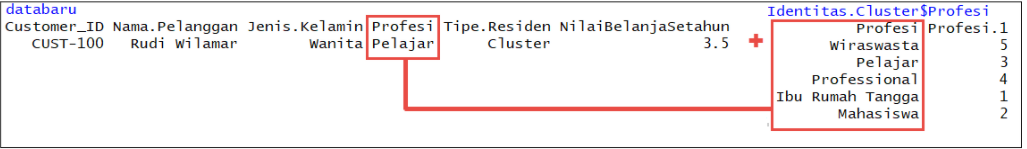
1. Variable databaru dengan Identitas.Cluster$Profesi memiliki nama kolom yang sama, yaitu Profesi.
2. Kolom Profesi kemudian akan dijadikan "kunci" untuk menggabungkan kedua variable ini.
3. Ternyata isi Profesi dari databaru, yaitu "Pelajar" juga terdapat di Identitas.Cluster. Ini akan membuat penggabungan menjadi berhasil.
4. Penggabungan ini juga akan mengambil kolom Profesi.1 dan isi data yang terkait dengan Pelajar, yaitu nilai 3.

Berikut adalah hasil akhirnya.


Perhatikan kalau kolom kunci, yaitu Profesi digeser ke depan. Dan sisanya adalah kolom-kolom dari kedua variable.

Tugas Praktek

Berikut adalah perintah dari pengembangan contoh di atas. Setelah terjadi penggabungan data, hasilnya disimpan kembali ke variable databaru.

databaru <- merge(databaru, Identitas.Cluster$Profesi)

Cobalah ketik perintah ini ke code editor dan lanjutkan perintahnya untuk menggabungkan juga variable Identitas.Cluster$Jenis.Kelamin dan Identitas.Cluster$Tipe.Residen. Kemudian tampilkan data akhirnya.

Jika eksekusi berjalan dengan lancar, hasil akhir akan terlihat sebagai berikut.
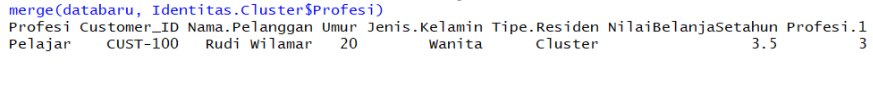

In [ ]:
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)
Identitas.Cluster <- readRDS(file="cluster.rds")
#Masukkan perintah untuk penggabungan data
databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)
databaru

# Menentukan Cluster
Kini saatnya penentuan untuk melakukan praktek terpenting bagi bisnis: data baru ini masuk ke segmen mana?

Gampang!

Yaitu dengan tahapan berikut:

1. mencari jarak kuadrat minimum atau terdekat
2. dari kolom numerik data baru tersebut
3. ke centroid kolom terkait
4. dari seluruh cluster yang ada

Kalau kita terjemahkan jadi rumus sebagai berikut:

which.min(sapply( 1:5, function( x ) sum( ( data[kolom] - objekkmeans$centers[x,])^2 ) ))

dimana:
1. min: merupakan function untuk mencari nilai minimum
2. 1:5 : adalah range nomor cluster dari 1 sampai dengan 5 (atau lebih sesuai dengan ukuran cluster)
3. sapply: digunakan untuk melakukan iterasi berdasarkan range (dalam kasus ini 1 s/d 5)
4. function(x): digunakan untuk proses dengan x diisi 1 s/d 5 per proses
5. (data[kolom] – objekkmeans$centers[x,]) ^2: adalah jarak kuadrat data. Ingat centers adalah komponen dari objek kmeans.
6. sum: digunakan untuk menjumlahkan jarak kuadrat

Mungkin Anda masih akan perlu memahami ini karena konstruksinya yang mungkin sedikit aneh tapi sebenarnya prinsipnya sederhana. Cobalah lakukan corat coret dan berkunjung kembali ke halaman ini dengan account DQLab untuk memahami rumusan ini.

Untuk saat ini…agar tidak membuang waktu, kita coba terapkan secara praktis pada tugas berikut.

Tugas Praktek

Perintah untuk menentukan cluster seperti pada contoh di atas untuk kasus kita telah terisi pada code editor berikut.

Jalankan code tersebut, dan hasil akhir adalah tampilan nomor cluster yang isinya 1.  Rubahlah umur pelanggan pada databaru dengan 32, jalankan kembali dan lihat hasilnya.

Kemudian jadikan perintah which.min(…) sebagai index pada referensi nama cluster (Segmen.Pelanggan) sehingga tampilan tidak mengeluarkan nomor cluster, tetapi nama cluster.

Petunjuk:

Index yang menggunakan which.min(…) sebagai index harus mengikuti format berikut. Perhatikan koma di penutup kurung siku.

Identitas.Cluster$Segmen.Pelanggan[which.min(…),]

In [ ]:
#membuat data baru
databaru <- data.frame(Customer_ID="CUST-100", Nama.Pelanggan="Rudi Wilamar",Umur=32,Jenis.Kelamin="Wanita",Profesi="Pelajar",Tipe.Residen="Cluster",NilaiBelanjaSetahun=3.5)

Identitas.Cluster <- readRDS(file="cluster.rds")

databaru <- merge(databaru, Identitas.Cluster$Profesi)
databaru <- merge(databaru, Identitas.Cluster$Jenis.Kelamin)
databaru <- merge(databaru, Identitas.Cluster$Tipe.Residen)

#menentukan data baru di cluster mana
which.min(sapply( 1:5, function( x ) sum( ( databaru[Identitas.Cluster$field_yang_digunakan] - Identitas.Cluster$Segmentasi$centers[x,])^2 ) ))
Identitas.Cluster$Segmen.Pelanggan[which.min(sapply(1:5, function(x) sum((databaru[Identitas.Cluster$field_yang_digunakan] - Identitas.Cluster$Segmentasi$centers[x,])^2))),]

# Kesimpulan
Praktek terakhir menunjukkan bagaimana data pelanggan baru dianalisa oleh model kita dan mengeluarkan nomor cluster atau segmen.

Dengan berakhirnya praktek ini, berarti menunjukkan kita sudah menjalani siklus tahap demi tahap memodelkan dan menggunakan customer segmentation terhadap data kita.

Silahkan lanjutkan ke content berikutnya untuk mendapatkan summary dan apa langkah kita selanjutnya.

# Kesimpulan
Selamat, Anda sudah menyelesaikan rangkaian langkah untuk mengerti penggunaan algoritma k-means di R dengan tujuan segmentasi pelangggan.

Dimulai dari persiapan data, menggunakan algoritma dan menganalisa hasilnya, mencari jumlah segmentasi paling optimal, memaketkan model yang dihasilkan agar dapat digunakan dalam operasional untuk membantu tim marketing melakukan otomatisasi dan menyampaikan pesan ke target yang tepat.